In [1]:
from manim import *

Manim Community v0.17.3

## Color Constants

These constants are listed at https://docs.manim.community/en/stable/reference/manim.utils.color.manim_colors.html#module-manim.utils.color.manim_colors.

The general idea is they name colors, and you can prepend `DARK` or `DARKER` or `PURE` (and sometimes `LIGHT` but not for al) or append variations like `_A` and `_B`.  But see the above page for a complete list because there are some one-offs too.

The __type__ of the color constants is __just a string__ with an HTML-style RGB value.  That means you can also just specify RGB values as strings with `#` yourself.

NOTE: the `_C` variations always match the no prefix or suffix versions.

<class 'str'>
#FC6255


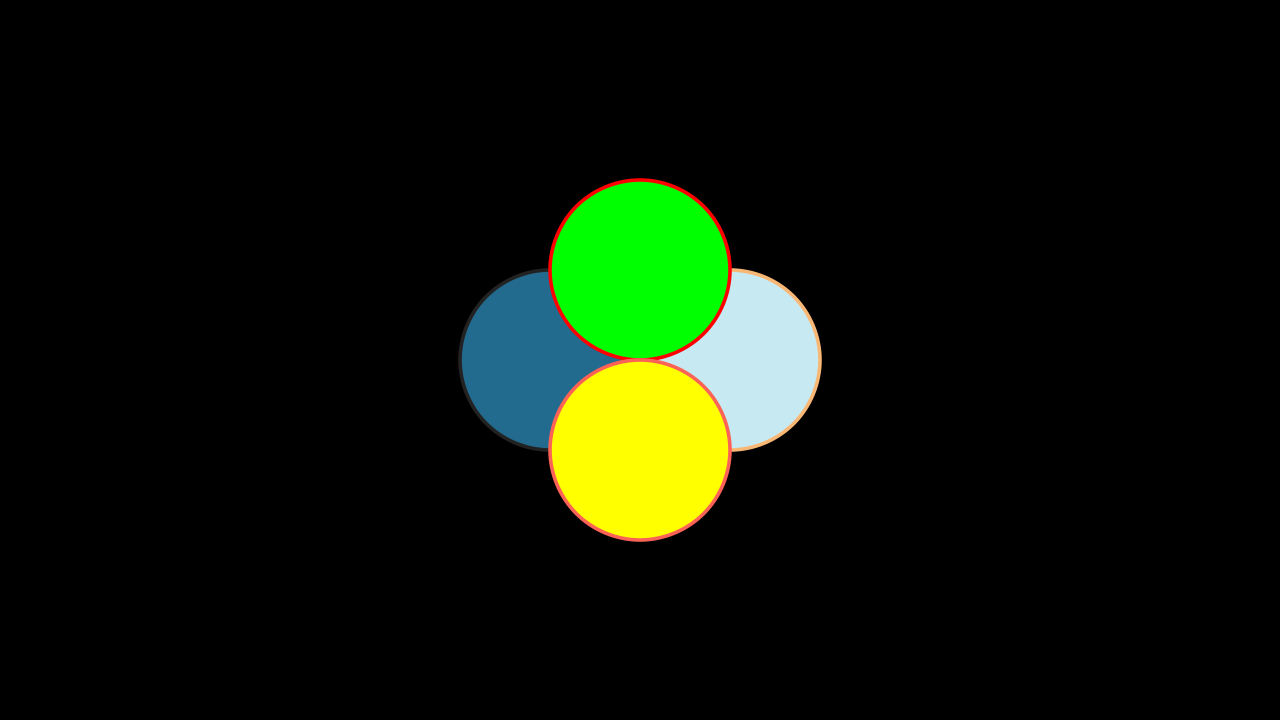

In [16]:
%%manim -v WARNING -qm ColorConstants

class ColorConstants(Scene):
    def construct(self):
        # basic colors
        circle = Circle()
        circle.set_fill(BLUE, opacity=1.0) # opacity defaults to 0.0 for fill
        circle.set_stroke(color=WHITE)
        self.add(circle)
        
        # dark and darker
        circle = Circle()
        circle.set_fill(color=DARK_BLUE, opacity=1.0)
        circle.set_stroke(color=DARKER_GRAY)
        circle.move_to(LEFT)
        self.add(circle)
        
        # variations
        circle = Circle()
        circle.set_fill(color=BLUE_A, opacity=1.0)
        circle.set_stroke(color=GOLD_B)
        circle.move_to(RIGHT)
        self.add(circle)
        
        # pure RGB primaries
        circle = Circle()
        circle.set_fill(color=PURE_GREEN, opacity=1.0)
        circle.set_stroke(color=PURE_RED)
        circle.move_to(UP)
        self.add(circle)
        
        # types
        print(type(RED))
        print(RED)
        
        # Using RGB
        circle = Circle()
        circle.set_fill(color='#FFFF00', opacity=1.0) # yellow
        circle.move_to(DOWN)
        self.add(circle)

## ParsableManimColor

https://docs.manim.community/en/stable/reference/manim.utils.color.core.html#manim.utils.color.core.ParsableManimColor - this doesn't seem to be a real type alias, but you can still use the concept from the doc.

The following options are demonstrated below for passing colors:

  * color constant
  * hex string
  * array of the above (which makes a gradient)
  * `ManimColor`, which you can't seem to access directly but can use functions to create or process
    * you can also pass a `ManimColor` within a gradient array
    * eg. `rgb_to_color()` to make an array of color constants (not ints) into a `ManimColor`
    * eg. `color_to_rgb()` to do the opposite
  * `color_gradient()` to interpolate multiple colors into a gradient over a given number of steps
  * functions that take alpha within the color can be used with `rgba_to_color` etc., but shape fills don't seem to honor the alpha

In [15]:
%%manim -v WARNING -qm ParsibleColor

class ParsibleColor(Scene):
    def construct(self):
        circle = Circle()
        self.add(circle)
        
        # constants and hex
        self.play(circle.animate.set_fill(color=BLUE, opacity=1.0))
        self.play(circle.animate.set_fill(color='#00FF00', opacity=1.0))
        self.play(circle.animate.set_fill(color='#ff0000', opacity=1.0))
        # self.play(circle.animate.set_fill(color=1, opacity=1.0)) # ints don't work unlike what doc says
        self.play(circle.animate.set_fill(color='0000ff', opacity=1.0)) # BAD (don't ommit the #)
        
        # gradients
        circle.scale(5)
        self.play(circle.animate.set_fill(color=[BLUE, RED, GREEN], opacity=1.0)) # array
        self.play(circle.animate.set_fill(color=(GREEN, RED, BLUE), opacity=1.0)) # tuple
        
        # ManimColor
        circle.scale(0.5)
        self.play(circle.animate.set_fill(color=rgb_to_color([1.0, 0, 0])))
        self.play(circle.animate.set_fill(color=rgba_to_color([1.0, 0, 0, 0.0]))) # alpha ignored
        print(color_to_rgb(rgb_to_color([1.0, 0, 0]))) # inverse operation
        self.play(circle.animate.set_fill(color=color_gradient([BLUE, RED, GREEN], 3), opacity=1.0)) # array
        self.play(circle.animate.set_fill(color=color_gradient([BLUE, rgba_to_color([1, 0, 0, 0]), GREEN], 10))) # alpha ignored
        
        self.wait(5)

[1. 0. 0.]


## Gradients

Gradients are applied in the `UL` direction from the start of the bounding box of the object to the other side by default.

You can change the direction with `set_sheen_direction`.

If you create your own gradient with `color_gradient()`, it will still get changed into a smooth gradient across the surface instead of posterized that way.

`alpha` is ignored by gradients.

3D objects have non-intuitive gradient behavior (as seen in the sphere below).

In [26]:
%%manim -v WARNING -qm Gradients

class Gradients(Scene):
    def construct(self):
        square = Square()
        square.scale(2)
        self.add(square)
        
        square.set_fill([RED, GREEN, BLUE], opacity=1.0)
        self.wait(5)
        square.set_fill([RED, GREEN, BLUE], opacity=1.0)
        square.set_sheen_direction(DOWN)
        self.wait(5)
        
        self.remove(square)
        dot = Dot3D(color=[RED, GREEN, BLUE], radius=5)
        self.add(dot)
        self.wait(5)

## color_gradient() for other purposes

In [4]:
%%manim -v WARNING -qm Gradients2

class Gradients2(Scene):
    def construct(self):
        colors = color_gradient([RED, BLUE], 10)  # Make 10 shades we can use
        for color in colors:
            self.add(Circle(color=color))  # Use the colors discretely
            self.wait()